
# סרטים שוברי קופות ברחבי העולם 1977-2019
מקור:
### https://www.kaggle.com/narmelan/top-ten-blockbusters-20191977

#### שמות המגישים:
+ 316165034-אלחנן ברנס
+ דביר אורן-206223638
+ 315537043 -יהדוה רווח


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

**הצגת הנתונים - בוא נראה עם מה יש לנו עסק**

In [2]:
url = "https://raw.githubusercontent.com/Elchbar96/project1/main/Blockbusters_2019-1977.csv"
df = pd.read_csv(url ,encoding= 'unicode_escape')
df.head(3)

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
0,2019,1,8.5,PG-13,Avengers: Endgame,"356,000,000",181,Walt Disney,"2,797,800,564","858,373,000",Action,Adventure,Drama
1,2019,2,7.0,PG,The Lion King,"260,000,000",118,Walt Disney,"1,656,943,394","543,638,043",Animation,Adventure,Drama
2,2019,3,7.2,PG,Frozen II,"150,000,000",103,Walt Disney,"1,420,560,456","470,089,732",Animation,Adventure,Comedy


In [3]:
df.tail(3)

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3
427,1977,8,6.6,PG,"Oh, God!","2,100,000",98,Warner Bros.,"41,687,243","41,687,243",Comedy,Fantasy,NaN
428,1977,9,8.0,PG,Annie Hall,"4,000,000",93,United Artists,"38,251,425","38,251,425",Comedy,Romance,NaN
429,1977,10,5.9,R,Semi-Tough,"5,700,000",108,United Artists,"37,187,139","37,187,139",Comedy,Romance,Sport


**העמודות המקוריות בדאטה היו בצורת אובייקט שינינו אותם לצורת אינטגר על מנת שנוכל לעבוד איתם**

In [4]:
df["film_budget"] = df["film_budget"].str.replace(",","")
df["domestic_gross"] = df["domestic_gross"].str.replace(",","")
df["worldwide_gross"] = df["worldwide_gross"].str.replace(",","")
df["film_budget"] = df["film_budget"].astype("int64")
df["domestic_gross"] = df["domestic_gross"].astype("int64")
df["worldwide_gross"] = df["worldwide_gross"].astype("int64")
df.dtypes

release_year              int64
rank_in_year              int64
imdb_rating             float64
mpaa_rating              object
film_title               object
film_budget               int64
length_in_min             int64
domestic_distributor     object
worldwide_gross           int64
domestic_gross            int64
genre_1                  object
genre_2                  object
genre_3                  object
dtype: object

**בוא נבדוק ערכים חסרים בדאטה ובאילו עמודות**

In [5]:
df.isna().sum()

release_year              0
rank_in_year              0
imdb_rating               0
mpaa_rating               1
film_title                0
film_budget               0
length_in_min             0
domestic_distributor      0
worldwide_gross           0
domestic_gross            0
genre_1                   0
genre_2                  21
genre_3                 106
dtype: int64

+ ניתן לראות שהדאטה שלנו שלמה ומלאה ברובה למעט שתי עמודות ז'אנר המשני שבהם גם ככה לא נתעסק

**הצגת קורלאצייה כללית בין כל העמודות**

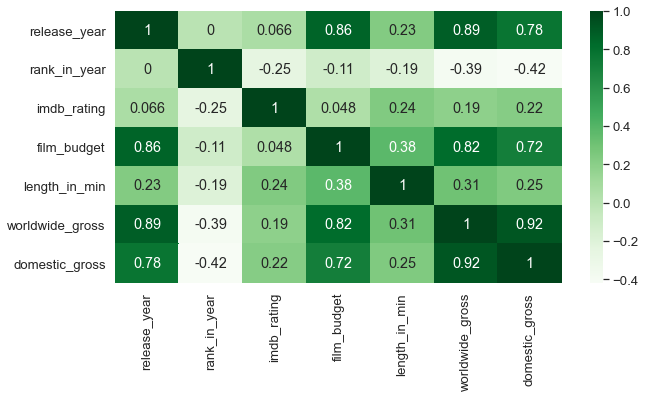

In [6]:
fig = plt.figure(1, figsize = (10,5))
sns.set(font_scale=1.2)
ax2 = sns.heatmap(df.corr("spearman"),annot=True,cmap="Greens")
plt.show()

**נרצה להבין את ההתפלגות בין הזאנרים של סרטים שוברי קופות**

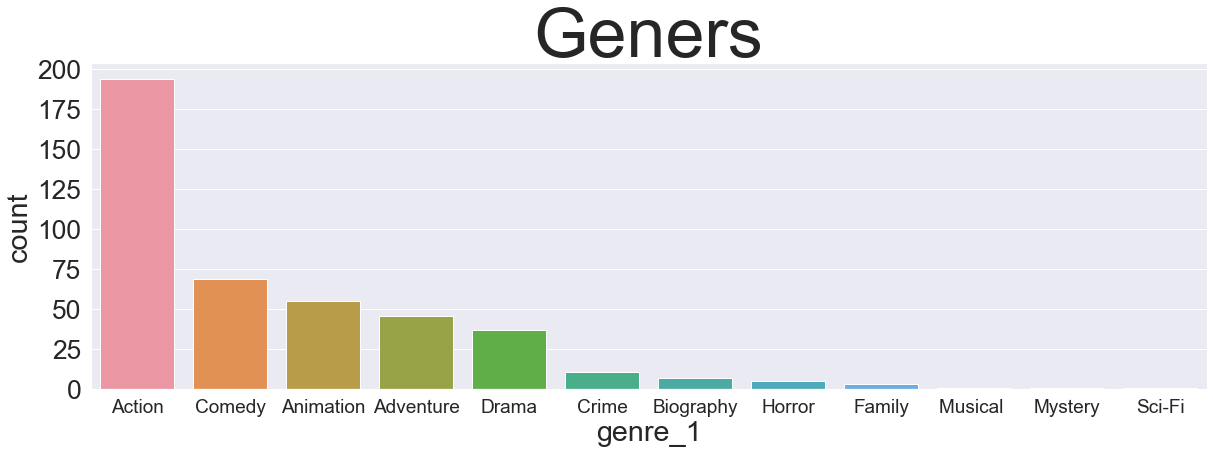

In [7]:
fig=plt.figure(1, figsize = (20,6))
sns.set(font_scale=2.4)
plt.title("Geners",fontsize=70)
sns.set(style='darkgrid')
ax = sns.countplot(x="genre_1", data=df,order = df['genre_1'].value_counts().index)
plt.setp(ax.get_xticklabels(),fontsize=19)
plt.show()

+ ניתן לראות שיש 5 זאנרים ששולטים בשוק באופן מובהק וזאנר האקשן שולט באופן משמעותי


**הבנת ההתפלגות בין חברות הפקת הסרטים**

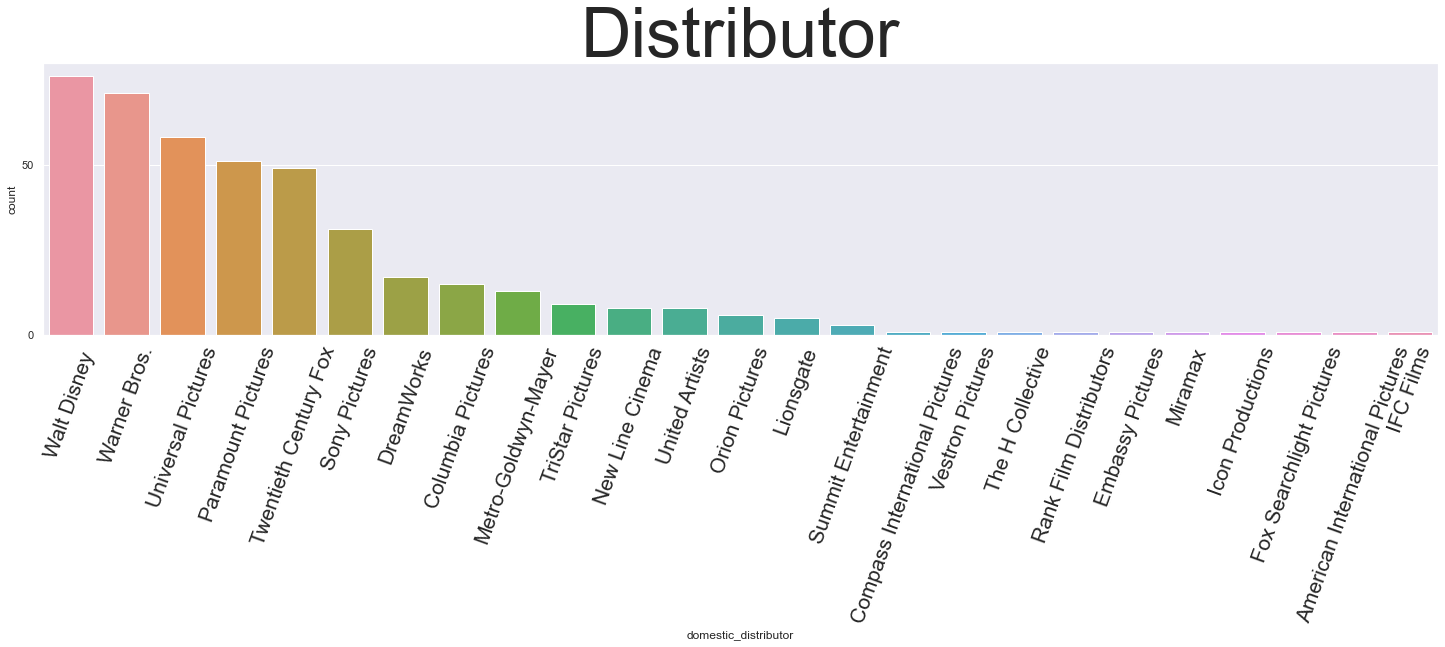

In [8]:
plt.figure(1, figsize = (25,5))
plt.title("Distributor",fontsize=70)
sns.set(style='darkgrid',font_scale=3.9)

ax = sns.countplot(x="domestic_distributor",
                   data=df,
                   order = df['domestic_distributor'].value_counts().index
                  )

plt.setp(ax.get_xticklabels(), rotation=70,fontsize=21)
plt.show()

+ ניתן לראות שקיימות חברות אשר זכו פעמים אחדות להיכנס לרשימת סרטי שוברי הקופות וחברות שסרטיהם זוכים להיות שוברי קופות במספרים גבוהים

**על מנת לנתח את ההכנסות הוספנו עמודה של הכנסות נטו ועמודה של אחוזי רווח לסרט**

In [9]:
df["net_profit"] = df["worldwide_gross"] - df["film_budget"]
df["precent_profit"]=(df["net_profit"]*100)/df["film_budget"]
df.head(3)

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,net_profit,precent_profit
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,858373000,Action,Adventure,Drama,2441800564,685.899035
1,2019,2,7.0,PG,The Lion King,260000000,118,Walt Disney,1656943394,543638043,Animation,Adventure,Drama,1396943394,537.285921
2,2019,3,7.2,PG,Frozen II,150000000,103,Walt Disney,1420560456,470089732,Animation,Adventure,Comedy,1270560456,847.040304


**?האם יש קשר בין הכנסות הסרט במדינת המקור לבין הכנסותיו בעולם**

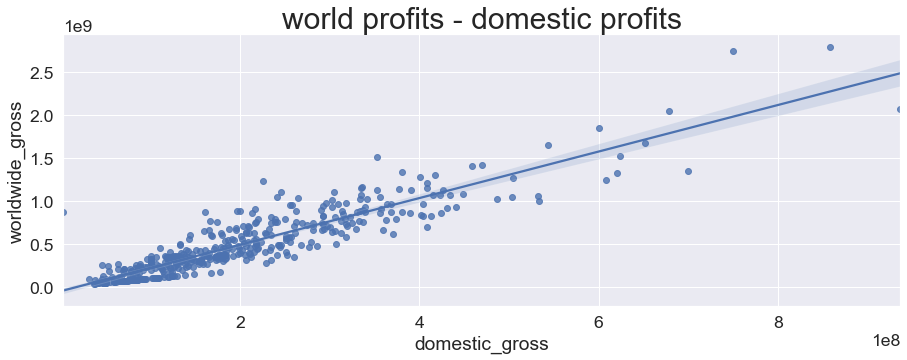

In [10]:
plt.figure(1,figsize=(15,5))
sns.set(font_scale=1.6)
plt.title('world profits - domestic profits',fontsize=30)
sns.regplot(data=df,x="domestic_gross",y="worldwide_gross")

+ נין לראות שיש קשר חזק בין הכנסות הסרט במדינה שלו לעומת הכנסות הסרט בעולם

**?האם ככל שנשקיע יותר בתקציב הסרט ההכנסות העולמיות שלנו יגדלו**

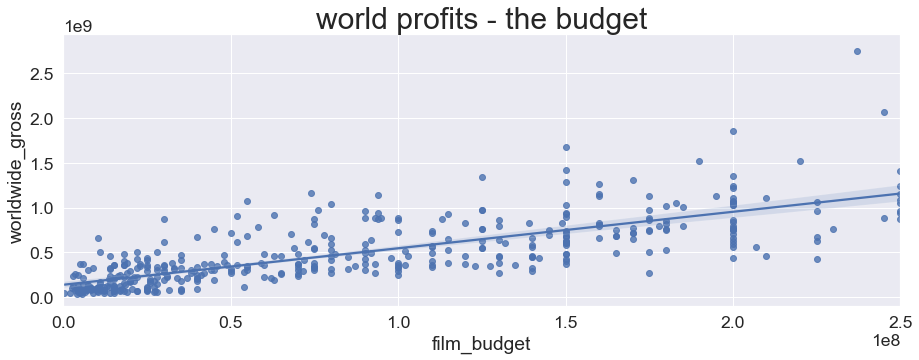

In [11]:
plt.figure(1,figsize=(15,5))
plt.title('world profits - the budget',fontsize=30)
plt.xlim(0,2.5*(10**8))
sns.regplot(data=df,x="film_budget",y="worldwide_gross")

+ ניתן לראות קשר יחסית חזק בין תקציב הסרט לבין הכנסותיו בעולם 

**רווחים נטו בממוצע לסרט - בהתפלגות לפי ז'אנרים**

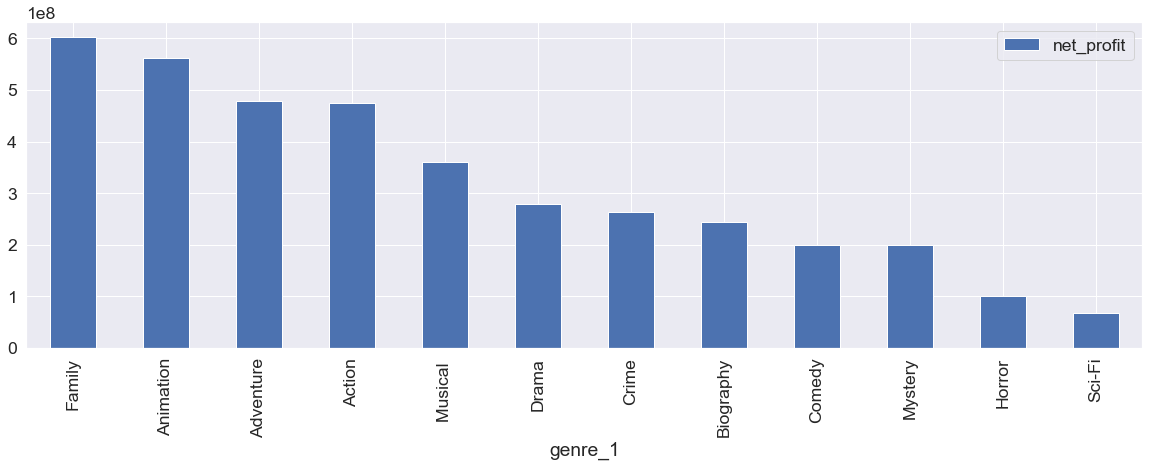

In [12]:
geners = pd.pivot_table(
df,index = ['genre_1'], values = ['net_profit']
).sort_values(by=['net_profit'], ascending = False)
geners.plot(kind='bar',figsize=(20,6))

+ ניתן לראות שהרווח נטו בממוצע לסרט הגבוה ביותר הוא לסרטי משפחה עם זאת עדיין מוקדם להגיע למסקנות - במיוחד שבדקו לפי ממוצע 

**אחוז רווח במוצע לחברת הפקות**

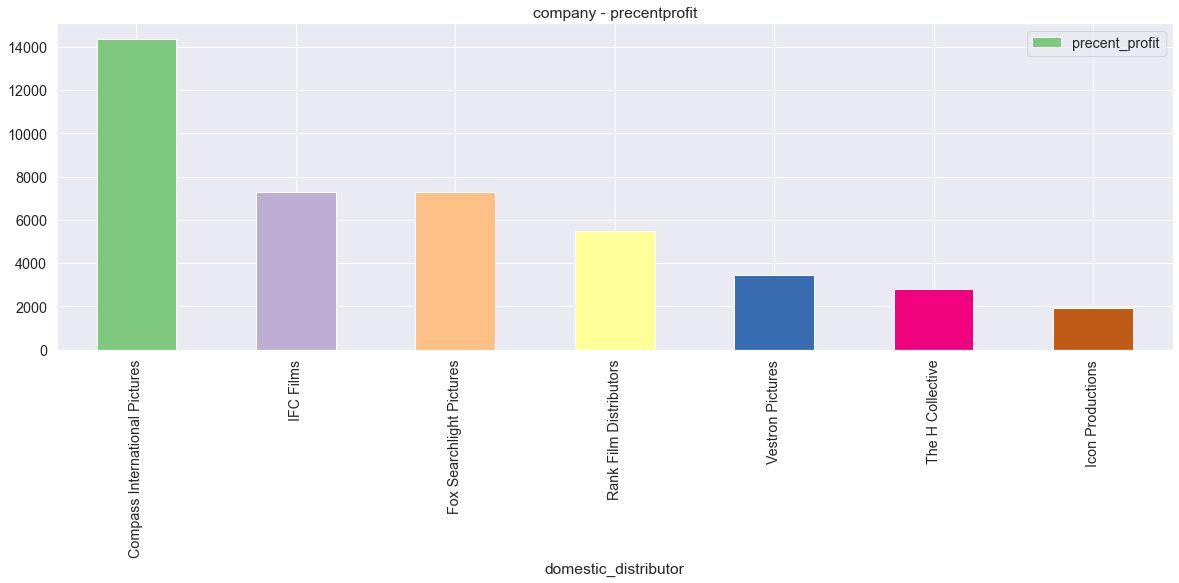

In [13]:
precentprofit = pd.pivot_table(
    df,index = ['domestic_distributor'], values = ['precent_profit']
).sort_values(by=['precent_profit'], ascending = False).head(7)
sns.set(font_scale=1.3)
precentprofit.plot(kind='bar', color=[plt.cm.Accent(np.arange(len(precentprofit)))],title='company - precentprofit',figsize=(20,6))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

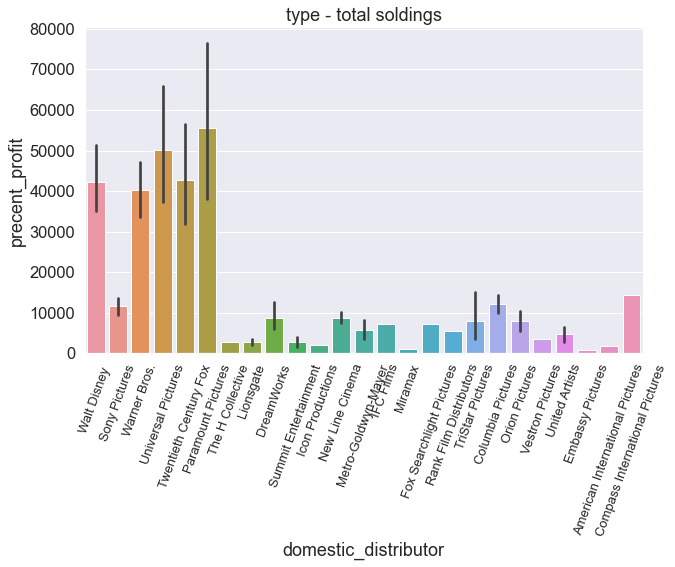

In [37]:
plt.figure(figsize=(10,6))
plt.title('type - total soldings')
sns.set(font_scale=1.5,style='darkgrid')
ax = sns.barplot(x='domestic_distributor', y='precent_profit', data=df, estimator=lambda y: sum(y))
plt.setp(ax.get_xticklabels(), rotation=70,fontsize=13)

**אם נוריד את כל החברות החד פעמיות - נוכל לקבל תמונה יותר ריאלית**

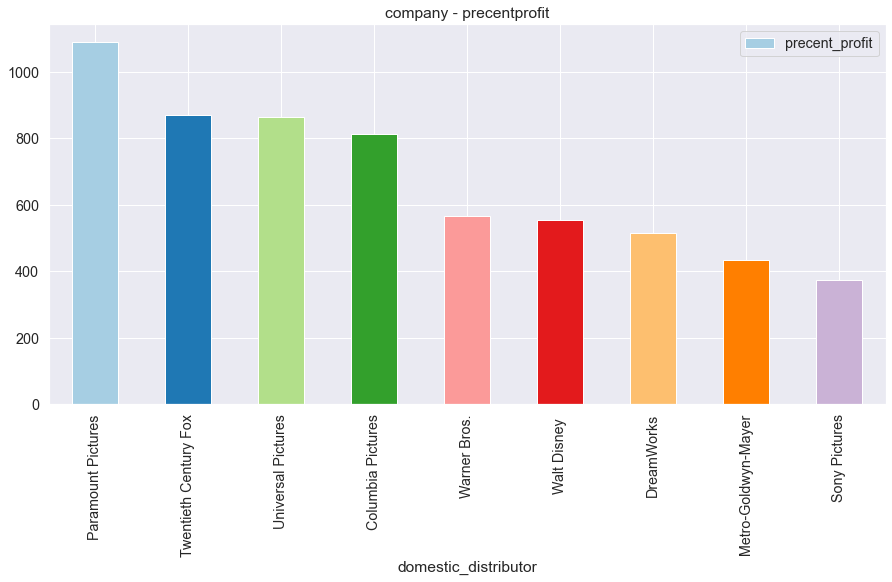

In [14]:
df1 = df.domestic_distributor.value_counts() > 10
l = df1.head(9).index.tolist()
df67= df[df['domestic_distributor'].isin(l)]

precentprofit2 = pd.pivot_table(
    df67,index = ['domestic_distributor'], values = ['precent_profit']
).sort_values(by=['precent_profit'], ascending = False)

precentprofit2.plot(kind = 'bar',color=[plt.cm.Paired(np.arange(len(precentprofit2)))],title='company - precentprofit', figsize=(15,7))


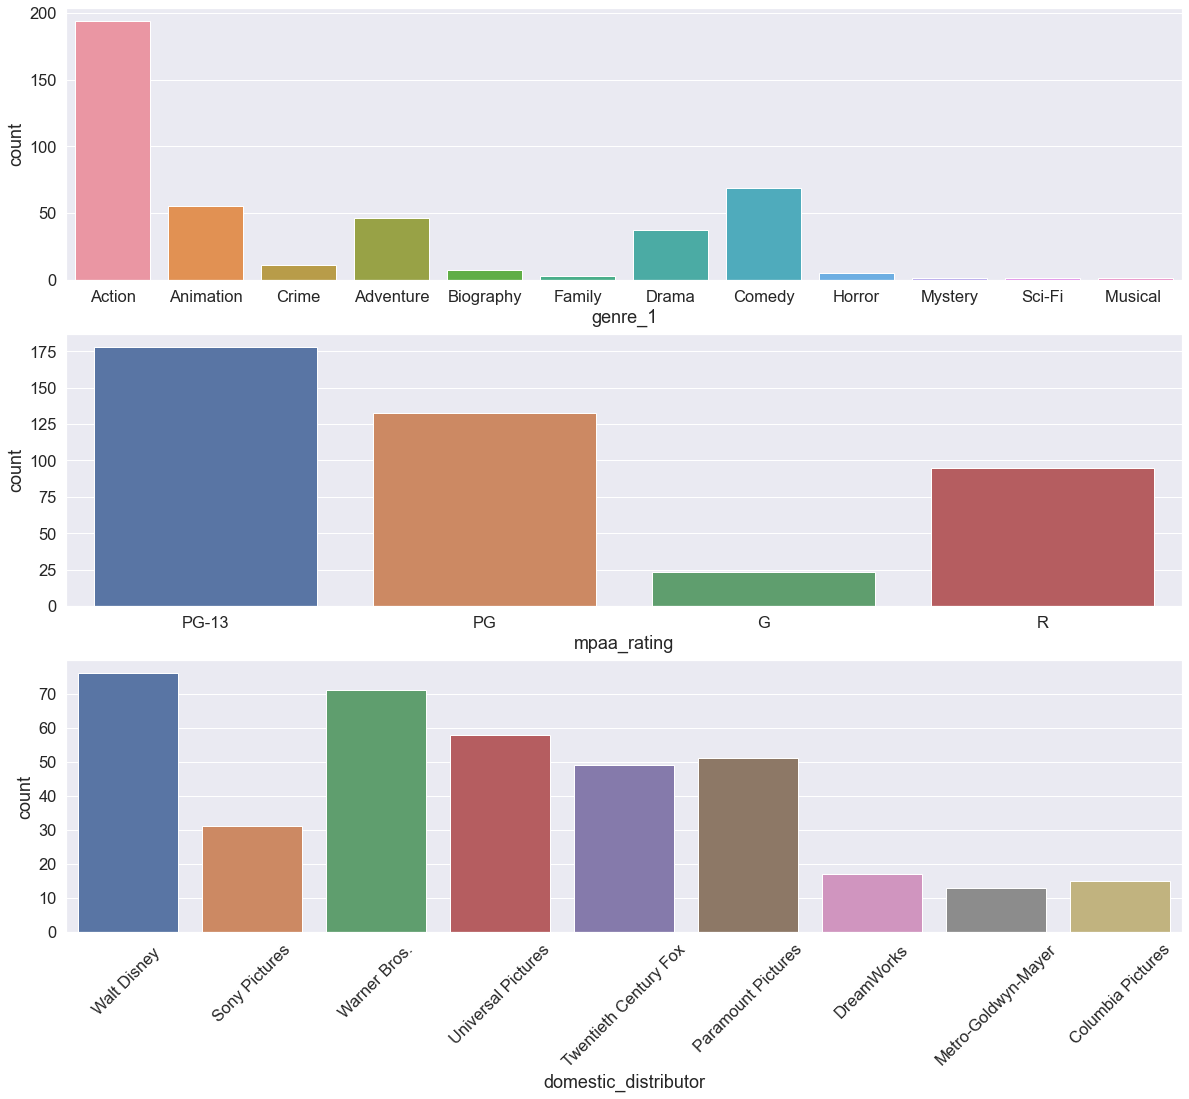

In [50]:
fig, axes = plt.subplots(figsize=(20, 17), nrows=3)
plt.xticks(rotation=45)
sns.countplot(ax=axes[2], x="domestic_distributor", data=df67)
sns.countplot(ax=axes[1], x="mpaa_rating", data=df)
sns.countplot(ax=axes[0], x="genre_1", data=df)
plt.show()


+ ניתן לראות שחברת פאראמאונט מככבת והיא אכן בין החברות הגדולות בז'אנר

**סכום כולל של חברה**

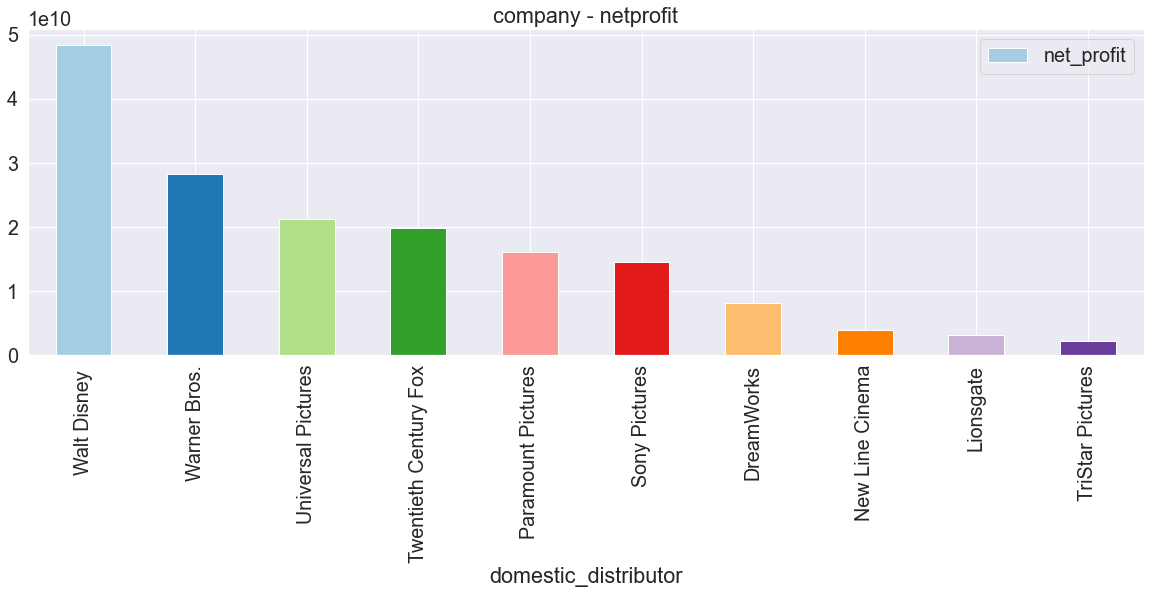

In [15]:
sns.set(font_scale=1.8)
company_sum = pd.pivot_table(
    df,index = ['domestic_distributor'], values = ['net_profit'],aggfunc='sum'
).sort_values(by=['net_profit'], ascending = False
             ).head(10)
company_sum.plot(kind='bar',color=[plt.cm.Paired(np.arange(len(company_sum)))],title='company - netprofit', figsize=(20,6))

**סכום כולל של חברה לחברות שהגיעו מעל 10 פעמיים לשוברי הקופות**

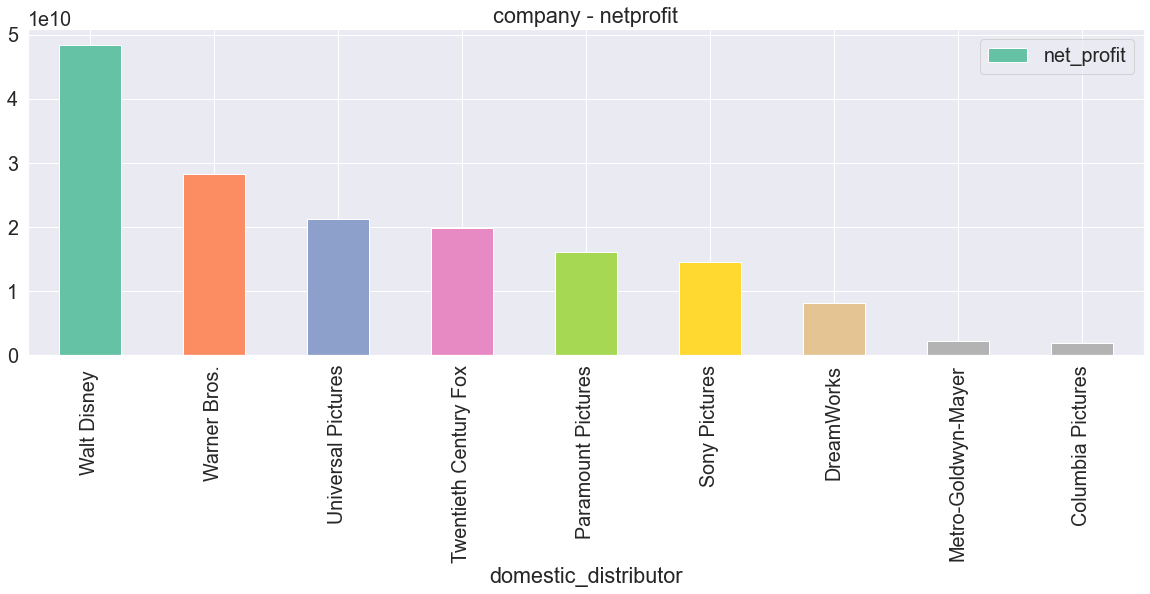

In [16]:
df1 = df.domestic_distributor.value_counts() > 10
l = df1.head(9).index.tolist()
df67= df[df['domestic_distributor'].isin(l)]
data = df67.groupby('domestic_distributor')[['net_profit']].sum().sort_values(by=['net_profit'],ascending = False)
data.plot(kind='bar',color=[plt.cm.Set2(np.arange(len(data)))],title='company - netprofit',figsize=(20,6))

+ מעניין לראות את ההבדל בין המרוויחים הגדולים לבין המרוויחים הגדולים שהופיעו מעל 10 פעמים באופן כללי- מעניין לראות שיש שינוי ויש חברות שהופיעו פחות אבל הרוויחו יותר באופן כללי (ניתן ליחס זאת לשנים שהחברות פעלו בהם ולדירוג שהן הגיעו אליו)
+ ניתן לראות שוולט דיסני נמאת בפער משמעותי מעל כל שאר החברות - גם את הפער המשעומתי בין המקום הראשון למקום השני (למרות שאין הבדל משמעותי בכמות המופעים) ניתן לייחס לשנים החזקות של החברה ומתי היא פרצה

**בוא נסתכל איך הרווחים השתנו במהלך השנים**

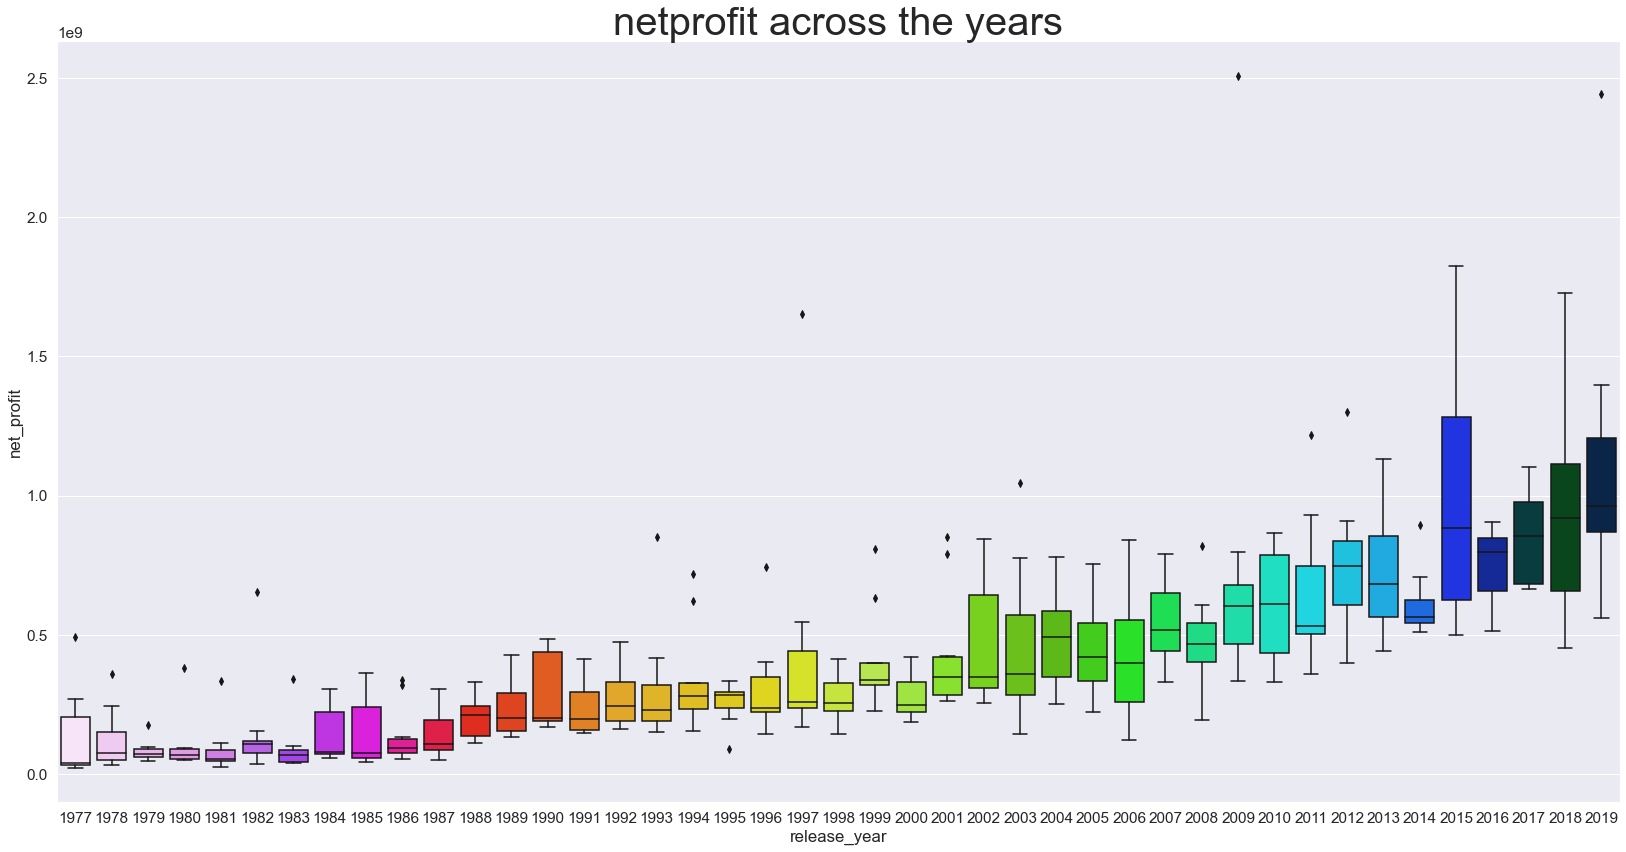

In [17]:
plt.figure(figsize = (28,14))
sns.set(style='darkgrid',font_scale=1.4)
plt.title('netprofit across the years',fontsize=40)
sns.boxplot(x='release_year',y='net_profit',data=df,palette='gist_ncar_r')

+ ניתן לראות שכלל שמתקדמים בשנים הרווחים נטו עולים - מתחבר עם המסקנות וההשערות שהיו לנו מקודם  

**דירוג שנתי לעומת הרווח נטו**

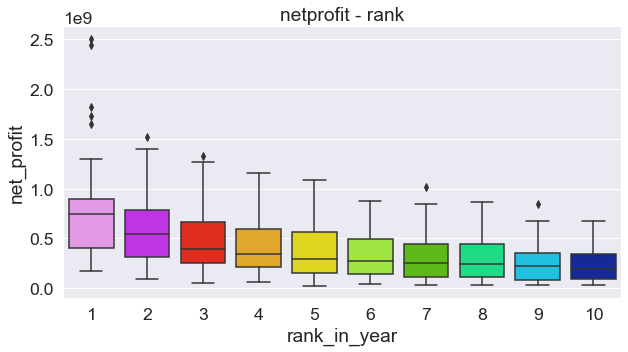

In [18]:
plt.figure(figsize = (10,5))
sns.set(font_scale= 1.6)
plt.title('netprofit - rank')
ax = sns.boxplot(x='rank_in_year',y='net_profit',data=df,palette='gist_ncar_r')

+ היינו בטוחים שנראה פערים יותר משמעותיים בהקשר של דירוג באותה שנה - מעניין לראות שאין כנראה הסיבה היא ששוברי קופות מוגדרים לפי הרווחים ברוטו

**שיווק**

**דירוג שנתי לעומת דירוג באתר אי אמ די בי**

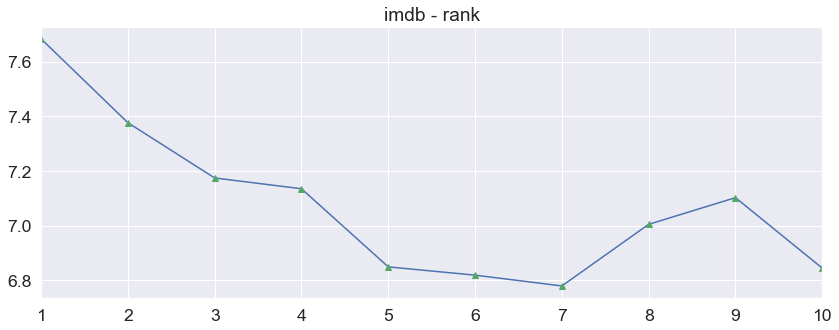

In [19]:
df_rank_vs_rating = df.groupby(['rank_in_year'])['imdb_rating'].mean()
plt.figure(figsize=(14,5))
sns.lineplot(data=df_rank_vs_rating)
plt.xlim(1,10)
plt.title('imdb - rank')
plt.plot(df_rank_vs_rating, 'g^')
plt.show()

+ אנחנו נרצה לקבל דירוג גבוה מהאייאמדיבי אנחנו רואים פה שאחוזי ההצלחה להתברג ב4 המקומות הראשונים מאוד תלוי בדירוג באתר עם זאת אחרי ה4 מקומות הראשונים הקשר בין הדירוג לבין האתר נחלש

**דירוג שנתי לעומת תקציב הסרט**

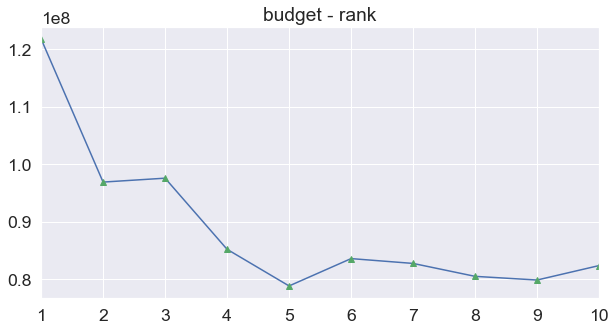

In [20]:
df34 = df.groupby(['rank_in_year'])['film_budget'].mean()
df34
plt.figure(figsize=(10,5))
sns.lineplot(data=df34)
plt.xlim(1,10)
plt.title('budget - rank')
plt.plot(df34, 'g^')
plt.show()

+ ניתן לראות שיש קשר בין התקציב של הסרט לבין הדירוג השנתי - אם אנחנו רוצים להתברג במקומות הראשונים - כנראה שנצטרך להשקיע יותר כסף - באופן כללי ישנה מגמה בולטת במיוחד בין המקום הראשון ואפילו שני ושלישי לעומת השאר

**שעוסקים בשיווק יהיה מעניין להסתכל על אורך השם של הסרט - כמה מילים הוא מכיל והאם יש קשר בין הדירוג השנתי לבין נתון זה. נציג את ההתפלגות הכללית למספר מילים בשם הסרט ולאחר מכן לפי דירוג**

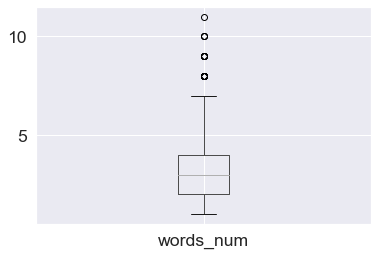

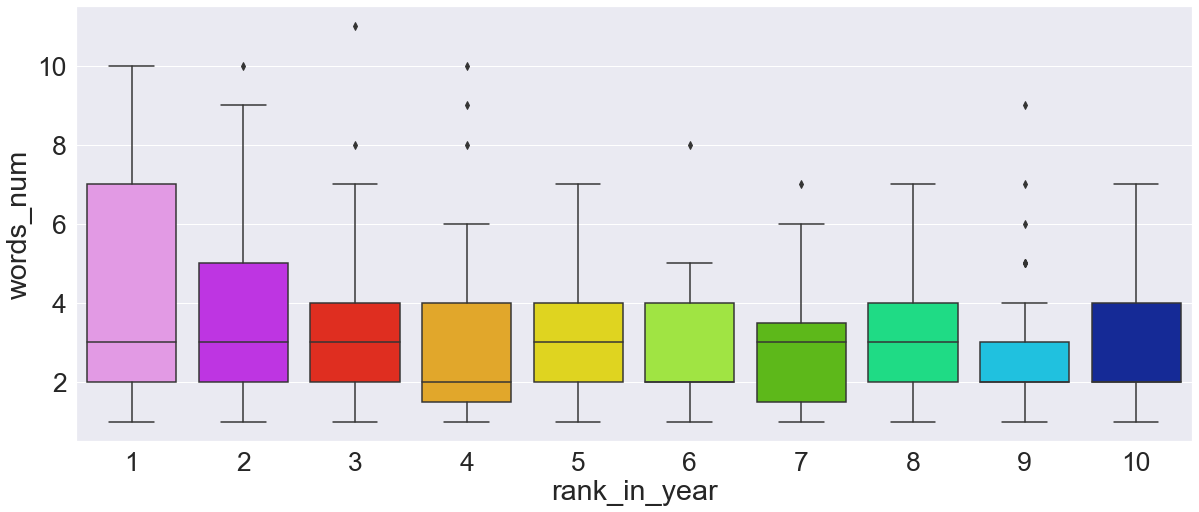

In [21]:
df["words_num"] = df["film_title"].str.split().str.len()
df.boxplot("words_num")
sns.set(font_scale=2.4)
plt.figure(figsize = (20,8))
sns.boxplot(x='rank_in_year',y='words_num',data=df,palette='gist_ncar_r')

+ המסקנה שלנו שבערך 3 מילים לשם של סרט הוא החציון הכללי - אבל לסרט בדירוג במקום הראשון יש התפלגות גבוהה יותר. מצד שני נשים לב שלמקום הראשון יש פיזור הרבה יותר רחב מלשאר בצורה מפתיעה - היינו מצפים לשמות קצרים וקולעים 

**הצגה פשוטה על ידי טבלה**

In [22]:
pd.pivot_table(df,index = ['rank_in_year'], values = ['words_num']).sort_values(by=['words_num'], ascending=False)

,words_num
rank_in_year,
1,4.279070
2,3.790698
3,3.209302
10,3.069767
4,3.000000
5,2.930233
6,2.883721
8,2.860465
9,2.837209


+ ניתן לראות איך המספרים משתנים ואיך יש סנכרון כמעט מושלם בין הדירוג למספר המילים בכותר

**נסתכל לרגע על הדירוג השנתי בהתפלגות הזאנרים (ניקח רק את 5 הדומיננטים) - זהו ממוצע לכן הכי נמוך בעצם הגיע הכי גבוה**

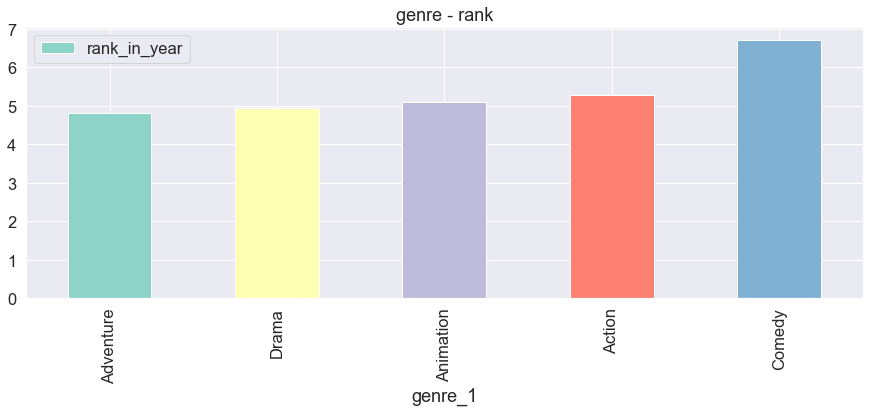

In [23]:
newdf = df.loc[df['genre_1'].isin(["Action","Comedy","Animation","Adventure","Drama"])]
sns.set(font_scale=1.5)
rank_geners = pd.pivot_table(
    newdf,index = ['genre_1'], values = ['rank_in_year']).sort_values(by=['rank_in_year'])
rank_geners.plot(kind='bar',color=[plt.cm.Set3(np.arange(len(rank_geners)))],title='genre - rank',figsize=(15,5))

+ דווקא זאנר ההרפתקאות שאמנם לא קיים כלכך באופן כללי - בדירוג השנתי הממוצע הוא מדורג גבוה יותר - אבל זה מהסיבה הפשוטה שהאקשן תופס הרבה מהמקומות ולכן הממוצע שלו נפגע. אבל ניתן להסיק שאם סרט מתחום ההרפתקאות יתברג ברשימה כנראה שיגיע גבוה. עם זאת ז'אנר האקשיין - הוא הכי   שכיח 

**נתון מעניין נוסף שנוכל להתמקד בו זה סיווג הסרט לפי גילאים ואיך הנתונים מתפלגים בהקשר זה**

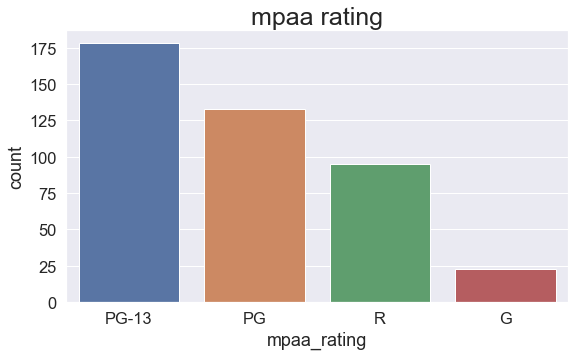

In [24]:
fig = plt.subplots(figsize=(9,5))
sns.set()
plt.title('mpaa rating',fontsize=25)
sns.countplot(x="mpaa_rating", data=df,order = df['mpaa_rating'].value_counts().index)

- ניתן לראות שהסרטים לגיאלי העשרה ומעלה הם הסרטים הכי שכיחים בשוברי הקופות

**לסיכום**

**התפלגות הסרטים לאורך השנים - בהתמקדות בארבעת הזאנרים הגדולים ביותר**

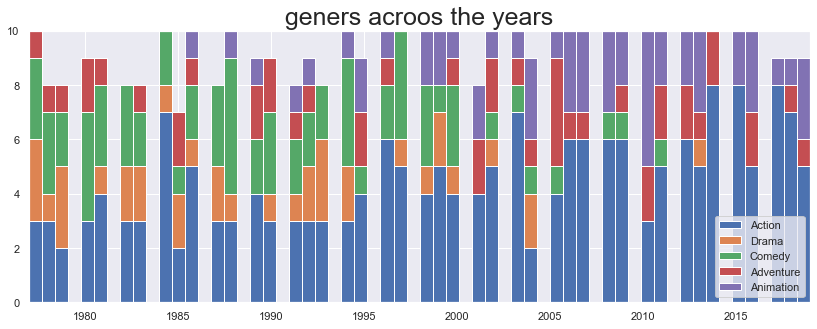

In [25]:
x = df.loc[df.genre_1 == 'Action']
y = df.loc[df.genre_1 == 'Drama']
z = df.loc[df.genre_1 == 'Comedy']
t = df.loc[df.genre_1 == 'Adventure']
p = df.loc[df.genre_1 == 'Animation']
plt.figure(figsize = (14,5))
plt.title('geners acroos the years',fontsize=25)
plt.xlim(1977,2019)
plt.hist(
    (x['release_year'],y['release_year'],z['release_year'],t['release_year'],p['release_year'])
    ,histtype='barstacked',
    bins = 60, 
    label=('Action','Drama','Comedy','Adventure','Animation')
)

plt.legend(loc='lower right')

 +  כמו שחשבנו יש ז'אנרים שהביקוש שלהם גדל ממש במרוצת השנים וז'אנרים שהולכים ונעלמים(לדוג' זאנר הדרמה שנעלם בשנים האחרונות כמעט לגמרי)

**נתמקד עכשיו בזאנרים בהתפלגות ביחס לדירוג השנתי מי כבש את המקומות הראשונים ומי שלט בכל מיקום**

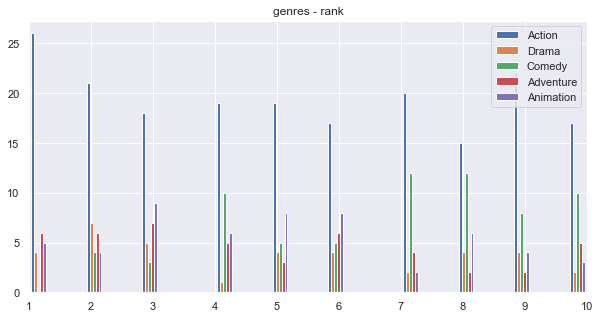

In [26]:
x = df.loc[df.genre_1 == 'Action']
y = df.loc[df.genre_1 == 'Drama']
z = df.loc[df.genre_1 == 'Comedy']
t = df.loc[df.genre_1 == 'Adventure']
p = df.loc[df.genre_1 == 'Animation']
plt.figure(figsize = (10,5))
plt.xlim(1,10)
plt.title("genres - rank")
plt.hist(
    (x['rank_in_year'],y['rank_in_year'],z['rank_in_year'],t['rank_in_year'],p['rank_in_year'])
    ,histtype='bar',
    bins = 30, 
    label=('Action','Drama','Comedy','Adventure','Animation')
)

plt.legend(loc='upper right')

+ מסקנה סופית: ניתן לראות בבירור שהאקשן שולט  בשוק שוברי הקופות באופן מוחלט- ויותר מכל כבש את המקום הראשון בצורה ברורה- גם לאורך השנים וגם בכלל הדירוגים  השונים

**נבדוק את יחסי הכוחות בין החברות הבולטות לאורך השנים**

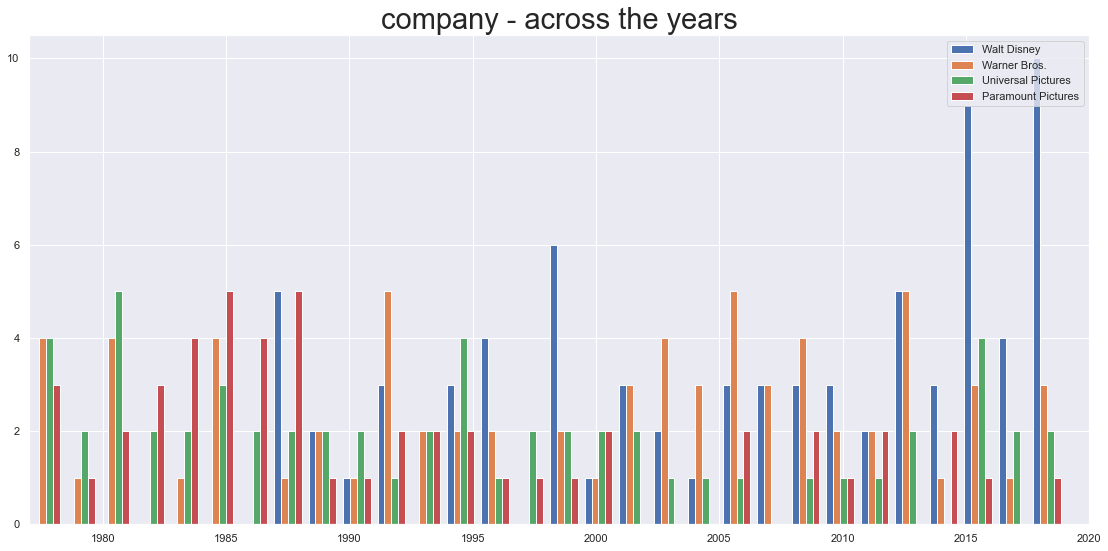

In [27]:
x = df[df['domestic_distributor'].str.contains("Walt Disney")]
y = df[df['domestic_distributor'].str.contains("Warner Bros.")]
z = df[df['domestic_distributor'].str.contains("Universal Pictures")]
t = df[df['domestic_distributor'].str.contains("Paramount Pictures")]
#p = df[df['domestic_distributor'].str.contains("Twentieth Century Fox")]
plt.figure(figsize = (19,9))
plt.xlim(1977,2020)
plt.title('company - across the years',fontsize=29)
plt.hist(
    (x['release_year'],y['release_year'],z['release_year'],t['release_year'])
    ,histtype='bar',
    bins = 30#I choose low number because its across a long period of time
    ,label=('Walt Disney','Warner Bros.','Universal Pictures','Paramount Pictures')
)
plt.legend(loc='upper right')

+ החברה ששולטת בשוק במגמה מאוד ברורה בשנים האחורנות  היא וולט דיסני - ניתן לראות שוולט דיסני גדלה על חשבן המתחרות החזקות בשוק-

**נמתקד עכשיו בסיווג הסרטים - לאיזה גלאים סרטי השוברי קופות מתאימים והאם היה שינוי במהלך השנים**

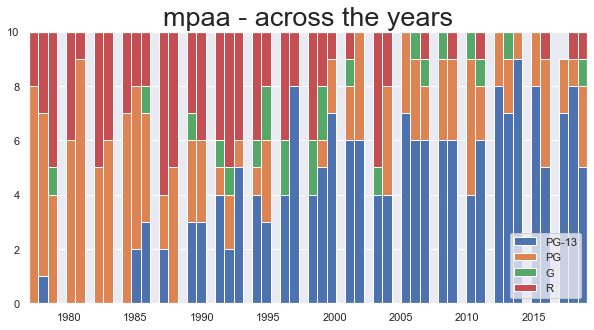

In [28]:
#mpaa_rating
x = df.loc[df.mpaa_rating == 'PG-13']
y = df.loc[df.mpaa_rating == 'PG']
z = df.loc[df.mpaa_rating == 'G']
t = df.loc[df.mpaa_rating == 'R']
plt.figure(figsize = (10,5))
plt.xlim(1977,2019)
plt.title('mpaa - across the years',fontsize=27)
plt.hist(
    (x['release_year'],y['release_year'],z['release_year'],t['release_year'])
    ,histtype='barstacked',
    bins = 60, 
    label=('PG-13','PG','G','R')
)

plt.legend(loc='lower right')

+ ניתן לראות בבירור מגמה עולה של סרטים לגלאי העשרה על חשבון סרטי המבוגרים וסרטים לכלל הגילאים - נותן לנו כיוון לקהל יעד לסרט-

**זום אין  על החברה המצליחה ביותר שלנו - וולט דיסני**

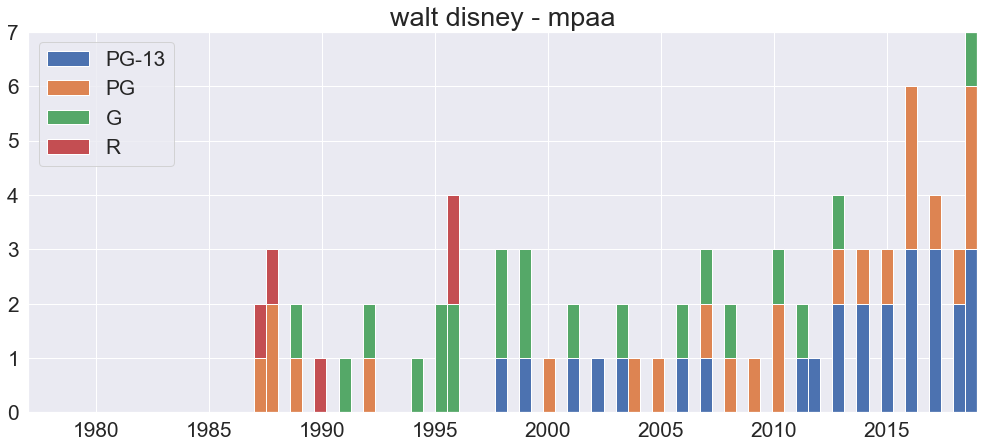

In [29]:
df1 = df[df['domestic_distributor'].str.contains("Walt Disney")]
x = df1.loc[df1.mpaa_rating == 'PG-13']
y = df1.loc[df1.mpaa_rating == 'PG']
z = df1.loc[df1.mpaa_rating == 'G']
t = df1.loc[df1.mpaa_rating == 'R']
sns.set(font_scale=1.9)
plt.figure(figsize = (17,7))
plt.xlim(1977,2019)
plt.title('walt disney - mpaa',fontsize=27)
plt.hist(
    (x['release_year'],y['release_year'],z['release_year'],t['release_year'])
    ,histtype='barstacked',
    bins = 60, 
    label=('PG-13','PG','G','R')
)

plt.legend(loc='upper left')


+ ניתן לראות שהחברה המצילחה ביותר הבינה את הנתון הקודם והתאימה את עצמה לביקוש 

**בוא נסתכל איזה קהל יעד כבש את המקומות הראשונים בעשרת השנים האחורונות**

In [30]:
df1 = df.loc[df['rank_in_year'] == 1]
df2 = df1.loc[df1['release_year'] > 2009]
df2

,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,net_profit,precent_profit,words_num
0,2019,1,8.5,PG-13,Avengers: Endgame,356000000,181,Walt Disney,2797800564,858373000,Action,Adventure,Drama,2441800564,685.899035,2
10,2018,1,8.5,PG-13,Avengers: Infinity War,321000000,149,Walt Disney,2048359754,678815482,Action,Adventure,Sci-Fi,1727359754,538.118303,3
20,2017,1,7.0,PG-13,Star Wars: Episode VIII - The Last Jedi,317000000,152,Walt Disney,1332539889,620181382,Action,Adventure,Fantasy,1015539889,320.359586,8
30,2016,1,7.8,PG-13,Captain America: Civil War,250000000,147,Walt Disney,1153296293,408084349,Action,Adventure,Sci-Fi,903296293,361.318517,4
40,2015,1,7.9,PG-13,Star Wars: Episode VII - The Force Awakens,245000000,138,Walt Disney,2068223624,936662225,Action,Adventure,Sci-Fi,1823223624,744.172908,8
50,2014,1,5.6,PG-13,Transformers: Age of Extinction,210000000,165,Paramount Pictures,1104054072,245439076,Action,Adventure,Sci-Fi,894054072,425.740034,4
60,2013,1,7.5,PG,Frozen,150000000,102,Walt Disney,1280802282,400738009,Animation,Adventure,Comedy,1130802282,753.868188,1
70,2012,1,8.0,PG-13,The Avengers,220000000,143,Walt Disney,1518812988,623357910,Action,Adventure,Sci-Fi,1298812988,590.369540,2
80,2011,1,8.1,PG-13,Harry Potter and the Deathly Hallows: Part 2,125000000,130,Warner Bros.,1341511219,381011219,Adventure,Drama,Fantasy,1216511219,973.208975,8
90,2010,1,8.3,G,Toy Story 3,200000000,103,Walt Disney,1066969703,415004880,Animation,Adventure,Comedy,866969703,433.484851,3


+ ניתן לראות שסרטים לגיאלי העשרה קטפו את המקומות הראשונים הראשונים בשנים האחרונות


# לסיכום: 
+ החברה השולטת והצומחת בשוק שאיתה נרצה לעבוד - וולט דיסני ללא צל של ספק
+ הז'אנר השולט בשוק שנרצה להתמקד בו - סרטי האקשן 
+ קהל היעד שבו נרצה להתמקד - גילאי העשרה 
+  השאיפה היא לקבל דירוג גבוה באתר איאמדיבי  7.6 ומעלה על מנת לקטוף את המקום הראשון
+ נרצה להשקיע הרבה בשיווק במדינה המקומית שבה מפורסם הסרט - דבר זה הוכיח בעבר שיוביל להצלחה עולמית
+ 

**למה כדאי להשקיע בסרטים**

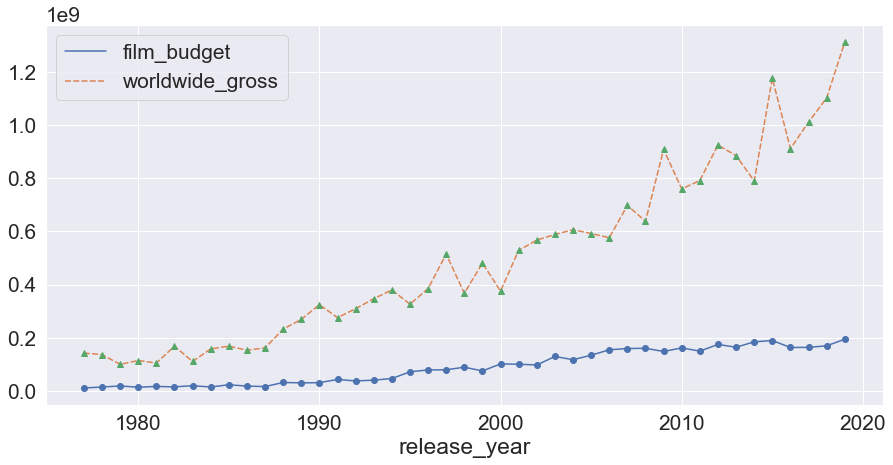

In [31]:
x = ['film_budget','worldwide_gross']
df2 = df.groupby(['release_year'])[x].mean()
plt.figure(figsize=(15,7))
sns.lineplot(data=df2)
sns.set(font_scale=1.1)
plt.plot(df2['film_budget'], 'bo',df2['worldwide_gross'], 'g^')
plt.show()


- ניתן לראות שהתקציב עולה בקצב אחיד ואיטי יחסית בעוד ההכנסות עולות בקצב גבוה